# Lecture 1

## Outline of Topics
 - Files for Input and Output
 - Reading from a CSV file
 - Example Wheat Yields
    - Data Wrangling
    - Analysis
 - Visualization
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Files for Input and Output
To this point we have only used the `print()` command for program output. Python also provides an `input()` function for user input of single variables, etc.

In order to handle large amounts of data we need a way to handle files for reading and writing.

All of the data in this lecture will be located in a `Data1` subdirectory relative to the home directory where python is running. To access it we need to be able to change the working directory by executing operating system commands from inside of the python program. The package that does this is called `os`.

In [2]:
import os

In [3]:
# Uses python's string format method.
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('Data1')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/jvk/Documents/Teaching/2020-HEC
Current working directory: /Users/jvk/Documents/Teaching/2020-HEC/Data1


If we wanted to move back to the original working directory we could execute the command `os.chdir('..')`

The `input()` command.

In [4]:
# For use later, please make sure the file exists in the 
# directory where you are running python. Please also be sure 
# that the file is a text file. Enter the entire name including 
# any extension, such as .txt or .csv
#
# The file I use here is part of a poem called 
# "TheLast-RowMan.txt"

my_file_name = input('Enter a filename that you want to open: ')

Enter a filename that you want to open: TheLast-RowMan.txt


In [5]:
# Check that you have one ...

print(type(my_file_name))
my_file_name

<class 'str'>


'TheLast-RowMan.txt'

### The `open()` command. 
When opening a file there are several modes that can be set and one must be careful because it is possible and easy to accidently overwrite an existing file. The modes of most interest are: 
1. `'r'` ... read-only
2. `'w'` ... write-only
3. `'a'` ... write-only but leave old data intact and append new data as file end

In [6]:
# Open the file for read-only. Then print it line by line
# and close the file. To see why the **end=''** is added to the
# print command, remove it, run, and see what happens.
#
# Notice that the open command looks in the current working 
# directory for the file.

print(my_file_name, '\n')
temp_file = open(my_file_name, "r")

for line_str in temp_file:
    print(line_str, end='')

temp_file.close()

TheLast-RowMan.txt 

Not drawing bow across violin
Yet he felt its cry
Not calculating fingers on keys
Yet he let the notes converse with him
Not pressing lips to golden trumpet
Yet the sound soared and expanded in him
Not beating hands on drum skins
Yet his mind moved in time
Not a playing member


In [9]:
# Create a name for a new file to put the finished poem in.
my_new_file_name = 'Finished-' + my_file_name

# This creates the new file and, if aleady exists, erases any 
# old content and replaces it with the first part of the poem
fout = open(my_new_file_name, "w")
fout.close()

# Get the data out of the original file and put it into a long
# string variable called "longline" which we initialize as an
# empty string.
longline = ''
fin = open(my_file_name, "r")

for line in fin:
    longline = longline + line

fin.close()

Now let's look at the string variable `longline` in two ways.

- First print as a single string
- Then use the `print` command to see how Python formats it for display

In [10]:
# As a string
longline

'Not drawing bow across violin\nYet he felt its cry\nNot calculating fingers on keys\nYet he let the notes converse with him\nNot pressing lips to golden trumpet\nYet the sound soared and expanded in him\nNot beating hands on drum skins\nYet his mind moved in time\nNot a playing member\n'

In [11]:
# Via print command
print(longline)

Not drawing bow across violin
Yet he felt its cry
Not calculating fingers on keys
Yet he let the notes converse with him
Not pressing lips to golden trumpet
Yet the sound soared and expanded in him
Not beating hands on drum skins
Yet his mind moved in time
Not a playing member



In [12]:
# Now print to the new file
fout = open(my_new_file_name, "a")
print(longline, file=fout)

fout.close() 

In [13]:
# Add the last line to the poem and print it. Note that print()
# is used in two ways here. First, we print to a file to add the
# last line to the file. Then we print all the lines to the 
# standard output (the terminal window) to see the completed 
# poem.

temp_file = open(my_new_file_name, "a")
print("Yet he knew how to listen", file=temp_file)
temp_file.close()

print(my_file_name, '\n')
temp_file = open(my_new_file_name, "r")

for line_str in temp_file:
    print(line_str,end='')
    
temp_file.close()

TheLast-RowMan.txt 

Not drawing bow across violin
Yet he felt its cry
Not calculating fingers on keys
Yet he let the notes converse with him
Not pressing lips to golden trumpet
Yet the sound soared and expanded in him
Not beating hands on drum skins
Yet his mind moved in time
Not a playing member

Yet he knew how to listen


### Summary
Notice how we seem to have added an extra `\n` character by accident. How might you verify this?

Also note also how we close the file after every use. This is important.

Poetry is nice, but that's not why you are reading this ...

How about some agricultural data in a `.csv` file?

## Reading from CSV file

What follows is a somewhat artificial example to illustrate processing of a `.csv` file using python. There are easier ways to solve the data wrangling exercise, but its a good exercise.

The question concerns county level average wheat yield data for many counties in the United States. I'm interested in this data because my family grows wheat in Colorado and I wonder how well we stack up with the rest of the country. The data comes from <a href="https://quickstats.nass.usda.gov/" target="_blank">the USDA National Agricultural Statistics Service</a>.

The data I'm using are stored in a file `WheatYields.csv`.

If you want to get some of your own data. Click on the link: <a href="https://quickstats.nass.usda.gov/" target="_blank">the USDA National Agricultural Statistics Service</a>.

The selections I made in creating this file are shown below. Note the large number of rows in the file. One of your lab exercises will require you to get some similar data for a crop or question of personal interest.

### My NASS quick stats selections:

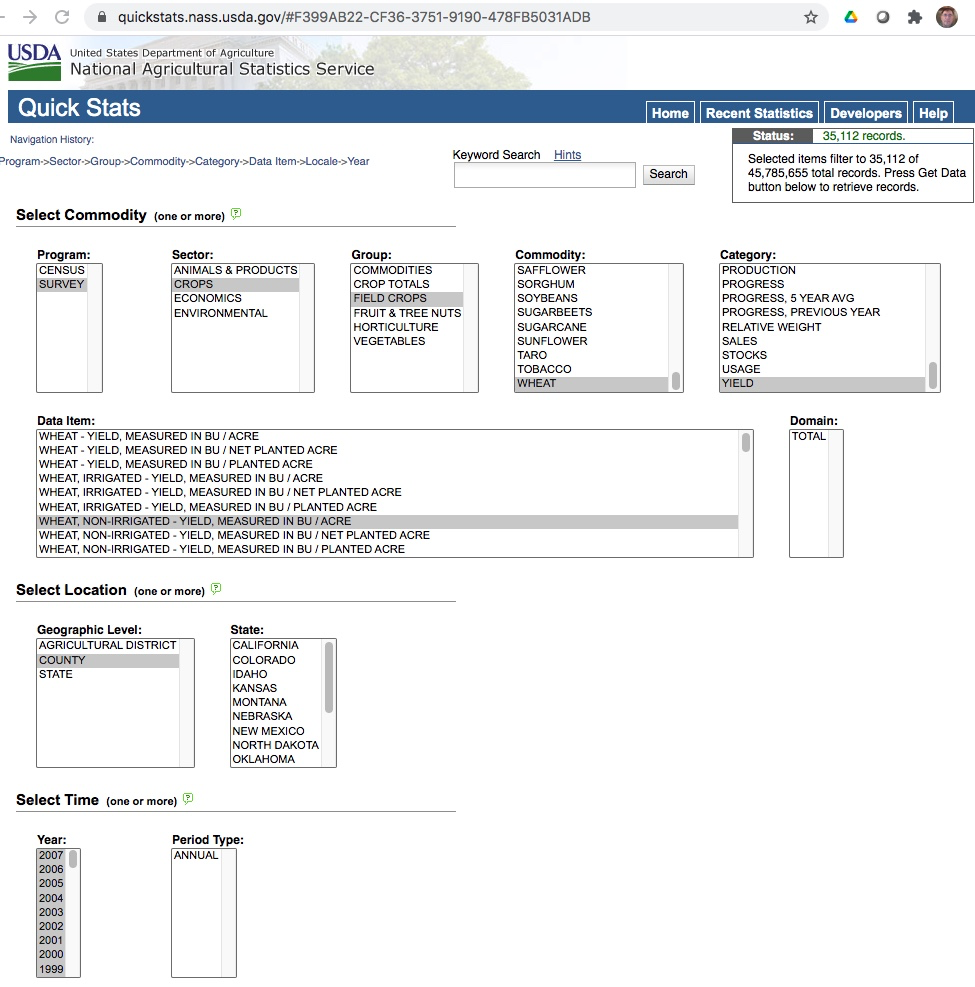

In [14]:
# Enter the file name for later use. This could have been 
# hardwired. I called the file "WheatYields.csv"

my_file_name = input('Enter a filename that you want to open: ')

Enter a filename that you want to open: WheatYields.csv


In [15]:
# Open the file for reading only and print the first few lines. 
# As written the first 6 lines will be printed.

fin = open(my_file_name, "r")

for i in range(6):
    line = fin.readline()
    print(line, end='')

fin.close()


"Program","Year","Period","Week Ending","Geo Level","State","State ANSI","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","watershed_code","Watershed","Commodity","Data Item","Domain","Domain Category","Value","CV (%)"
"SURVEY","2007","YEAR","","COUNTY","CALIFORNIA","06","CENTRAL COAST","40","CONTRA COSTA","013","","","00000000","","WHEAT","WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE","TOTAL","NOT SPECIFIED","35",""
"SURVEY","2007","YEAR","","COUNTY","CALIFORNIA","06","CENTRAL COAST","40","MONTEREY","053","","","00000000","","WHEAT","WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE","TOTAL","NOT SPECIFIED","60",""
"SURVEY","2007","YEAR","","COUNTY","CALIFORNIA","06","CENTRAL COAST","40","OTHER (COMBINED) COUNTIES","","","","00000000","","WHEAT","WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE","TOTAL","NOT SPECIFIED","57.5",""
"SURVEY","2007","YEAR","","COUNTY","CALIFORNIA","06","CENTRAL COAST","40","SAN LUIS OBISPO","079","","","00000000","","

### Looking at the first few lines of the file notice:
1. The first line contains header information and we see 21 columns. 
2. Some of the information is empty and some of it is the same over the whole set. For example we are not interested in zip codes or geographical regions larger than counties. We also know that the commodity is wheat and the data element is non-irrigated wheat yield measured in bu/acre. So we would not need to keep those columns.
3. The critical information includes the year, state name, county name, and the average yield (located near the end of the string)
4. Finally, the Other (COMBINED) COUNTIES lines should be removed since we really only want county yields.

# Wrangling the Data File

The data file name is held in the string variable `my_file_name`. We need to create a new file to hold the *wrangled data*.

In [16]:
# The "+" operator concatenates text strings. As written here it prepends
# the new word to the original name.

my_new_file_name = 'Wrangled-' + my_file_name
my_new_file_name

'Wrangled-WheatYields.csv'

In [18]:
fin = open(my_file_name, "r")

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# Read the first line containing header and split the line 
# string into fields on the comma separator. This returns a 
# list where each list element is one of comma delimited 
# strings. For the .csv files here there will be 21 
# substrings in each line. They are numbered from 0 to 20. 
# We want to retain numbers
#
# 1 (Year), 5 (State), 6 (State ANSI), 9 (County), 10 (County
# ANSI), and 19 (Value). 
#
# The code below creates the header for the new csv file

line = fin.readline()
fin.close()

fields = line.split(',')
newline = fields[1] + ',' + fields[5] + ',' + fields[6] + ','
newline = newline + fields[9] + ',' + fields[10] + ','
newline = newline + fields[19]

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 

In [20]:
# Just to see what the newline variable looks like
newline

'"Year","State","State ANSI","County","County ANSI","Value"'

In [21]:
# Now I want to go through the input csv line by line deleting 
# the superfluous fields and appending the new lines to the 
# "wrangled" file. Here rises a special case, which is a common 
# problem in data wrangling. Note that the lines in this csv 
# file from the second onward actually have 23 fields in each 
# (at least from the perspective of the .split method.) This 
# has happened because there are two commas inside of the "data 
# item" field where we find ...
#   "WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE"
# There are other ways to handle this problem, but here a 
# simple fix is simply to realize that the desired numeric 
# value is now located in position indexed by 21.

fin = open(my_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

fout = open(my_new_file_name, "a")

for line in fin:
    if "OTHER" in line:
        continue # This removes the combined counties
    else:
        fields = line.split(',')
        newline = fields[1] + ',' + fields[5] + ','
        newline = newline + fields[6] + ',' + fields[9] + ','
        newline = newline + fields[10] + ',' + fields[21]
        print(newline, file=fout)

fin.close()
fout.close()

# Inside Wrangled-WheatYields.csv

What remains is the numeric county average wheat yield data for a large number of U.S. counties and years. Here we read this data into a numpy array in order to apply some statistics, etc.

In [22]:
# Open the wrangled file for reading only and print the first few 
# lines.

fin = open(my_new_file_name, "r")

for i in range(6):
    line = fin.readline()
    print(line, end='')

fin.close()

"Year","State","State ANSI","County","County ANSI","Value"
"2007","CALIFORNIA","06","CONTRA COSTA","013","35"
"2007","CALIFORNIA","06","MONTEREY","053","60"
"2007","CALIFORNIA","06","SAN LUIS OBISPO","079","48"
"2007","CALIFORNIA","06","LASSEN","035","0"
"2007","CALIFORNIA","06","MODOC","049","0"


In [23]:
# Open the wrangled file.

fin = open(my_new_file_name, "r")
y = np.array([]) #Initialize an empty numpy array
line = fin.readline() #Read first line to move past header   

# We can easily see that the wheat yield value are located 
# in the last column (index = 5)
for line in fin:
    fields = line.split(',')
    s = fields[5]
    s = s.replace('\n', '') #Delete newline character at the end
    s = s.replace('"', '') #Delete extra double quotes
    y = np.append(y, float(s))
                      
fin.close()

In [24]:
# Let's examine the values in the numpy array y
y

array([35. , 60. , 48. , ..., 13.5, 13.5, 15. ])

In [25]:
# How many entries are in y?
len(y)

34116

In [26]:
# Compute some basic statistics about the values in
# y 
USmean = np.mean(y)
USstd = np.std(y)
USmin = np.min(y)
USmax = np.max(y)

In [27]:
# Display the mean value
USmean

28.39621292062376

Of course, it looks silly to present 15 digits of precision. We don't want folks to think we are "uneducated". Therefore, let's format ...

In [28]:
print(f'U.S. Average C. A. Wheat Yield (over many years) is {USmean:.1f} bu/acre.')

U.S. Average C. A. Wheat Yield (over many years) is 28.4 bu/acre.


In [29]:
print(f'U.S. Min. C. A. Wheat Yield (over many years) is {USmin:.1f} bu/acre.')

U.S. Min. C. A. Wheat Yield (over many years) is 0.0 bu/acre.


In [30]:
print(f'U.S. Max. C. A. Wheat Yield (over many years) is {USmax:.1f} bu/acre.')

U.S. Max. C. A. Wheat Yield (over many years) is 105.0 bu/acre.


In [31]:
print(f'U.S. Std of C. A. Wheat Yield (over many years) is {USstd:.1f} bu/acre.')

U.S. Std of C. A. Wheat Yield (over many years) is 13.1 bu/acre.


(array([1.020e+02, 3.590e+02, 1.248e+03, 1.741e+03, 2.930e+03, 3.769e+03,
        3.977e+03, 4.021e+03, 4.153e+03, 3.202e+03, 2.640e+03, 1.873e+03,
        1.250e+03, 7.340e+02, 5.350e+02, 3.180e+02, 2.760e+02, 2.000e+02,
        1.530e+02, 1.520e+02, 1.120e+02, 8.400e+01, 9.900e+01, 5.400e+01,
        5.400e+01, 3.300e+01, 1.800e+01, 1.600e+01, 1.000e+01, 3.000e+00]),
 array([  0. ,   3.5,   7. ,  10.5,  14. ,  17.5,  21. ,  24.5,  28. ,
         31.5,  35. ,  38.5,  42. ,  45.5,  49. ,  52.5,  56. ,  59.5,
         63. ,  66.5,  70. ,  73.5,  77. ,  80.5,  84. ,  87.5,  91. ,
         94.5,  98. , 101.5, 105. ]),
 <a list of 30 Patch objects>)

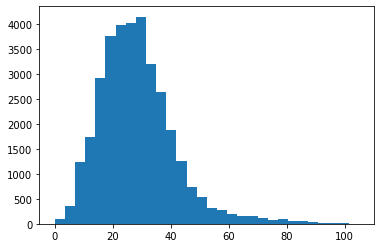

In [32]:
# Let's plot a histogram of these county average wheat yields ...
plt.hist(y, bins=30)

The county average yields above were taken over many years and many places. In all likelihood it does not really make sense to compute the mean across all of these. At the very least we expect that average wheat yield has improved over time. To understand how we might further examine the data we need to understand the possible values taken by some of the other columns in the table.

Might be a case where the `set` variable is useful.

In [33]:
# Open the wrangled file.

fin = open(my_new_file_name, "r")
line = fin.readline() #Read first line to move past header 

# Initialize some empty sets
states = set()
years = set()
state_county_pairs = set()

# The year values are located in the first column (index = 0)
# The state values in the second column (index = 1)
for line in fin:
    fields = line.split(',')
    s = fields[1].replace('"', '')
    states.add(s)
    yrs = fields[0].replace('"', '')
    years.add(yrs)
    c = fields[3].replace('"', '')
    state_county_pairs.add(s + '-' + c)
                      
fin.close()

In [34]:
print(f'The number of unique states is {len(states):2d}.')
print(f'The set of states is {states}.')

The number of unique states is 15.
The set of states is {'CALIFORNIA', 'NEW MEXICO', 'TEXAS', 'NORTH DAKOTA', 'COLORADO', 'OREGON', 'UTAH', 'WASHINGTON', 'NEBRASKA', 'SOUTH DAKOTA', 'MONTANA', 'OKLAHOMA', 'KANSAS', 'IDAHO', 'WYOMING'}.


In [35]:
print(f'The number of unique years is {len(years):2d}.')
print(f'The set of years is {years}.')

The number of unique years is 79.
The set of years is {'1930', '1962', '1958', '1977', '1937', '1984', '1957', '1959', '1951', '1963', '1973', '1982', '1946', '1953', '1950', '1955', '2003', '2001', '1969', '1934', '1943', '1972', '1978', '1986', '2007', '1949', '2000', '1947', '1971', '1965', '1997', '1970', '1960', '1990', '1933', '1992', '1938', '2005', '1974', '1985', '1964', '1989', '1976', '1966', '1932', '1996', '1945', '1967', '1931', '2006', '1948', '1940', '1998', '1956', '1981', '1991', '1944', '1942', '1988', '1968', '2002', '1929', '1954', '1935', '2004', '1995', '1941', '1961', '1939', '1999', '1936', '1987', '1980', '1952', '1979', '1993', '1975', '1994', '1983'}.


In [36]:
print(f'The number of unique state-county pairs is {len(state_county_pairs):2d}.')
print(f'The set of state-county pairs is {state_county_pairs}.')

The number of unique state-county pairs is 972.
The set of state-county pairs is {'MONTANA-LIBERTY', 'TEXAS-REEVES', 'TEXAS-TRINITY', 'COLORADO-JACKSON', 'IDAHO-BENEWAH', 'OREGON-WHEELER', 'KANSAS-KEARNY', 'OKLAHOMA-LOVE', 'TEXAS-TERRY', 'OKLAHOMA-PUSHMATAHA', 'OREGON-WASHINGTON', 'IDAHO-LEMHI', 'KANSAS-STANTON', 'TEXAS-WILLACY', 'NEBRASKA-WHEELER', 'NEBRASKA-SAUNDERS', 'TEXAS-COOKE', 'CALIFORNIA-SUTTER', 'MONTANA-CASCADE', 'COLORADO-SAN MIGUEL', 'MONTANA-POWDER RIVER', 'NEBRASKA-RED WILLOW', 'SOUTH DAKOTA-GRANT', 'KANSAS-HASKELL', 'KANSAS-COMANCHE', 'TEXAS-BANDERA', 'WASHINGTON-ASOTIN', 'OKLAHOMA-PAYNE', 'OREGON-MULTNOMAH', 'NEBRASKA-FRANKLIN', 'COLORADO-CHEYENNE', 'TEXAS-BOSQUE', 'CALIFORNIA-LOS ANGELES', 'TEXAS-DICKENS', 'TEXAS-HARDIN', 'NORTH DAKOTA-SHERIDAN', 'SOUTH DAKOTA-TODD', 'TEXAS-HOUSTON', 'MONTANA-TOOLE', 'IDAHO-JEFFERSON', 'NORTH DAKOTA-PIERCE', 'NEBRASKA-FURNAS', 'SOUTH DAKOTA-UNION', 'TEXAS-PECOS', 'IDAHO-LEWIS', 'KANSAS-DICKINSON', 'IDAHO-KOOTENAI', 'TEXAS-KINNEY', 'NO

### Observations
Well from this we clearly see that when we compute means, standard deviations, or even histograms for this entire collection, we are in-effect comparing apples and oranges and cauliflower for that matter.

What would we really like to do?

1. Directly compare counties in the same year.
2. For a particular county or set of counties, plot the trend in county average yield over time.
3. Look at the correlation of county average yields separated by 1 year, 2 years, etc.
4. Examine county average yields on a map.

Likely issues: Missing data. Unknown ordering of the data in the `.csv` files and therefore in the simplified and filtered files we have created. This since we have made no special effort to order the lines. But let's check ...

In [37]:
# Open the wrangled file for comparison of years 2006 and
# 2007.

fin = open(my_new_file_name, "r")
line = fin.readline() #Read first line to move past header 

y2007 = np.array([]) #Initialize an empty numpy arrays
y2006 = np.array([])

for line in fin:
    fields = line.split(',')
    
    # Remove possible double quotes and newlines
    yrs = fields[0].replace('"', '')
    yval = fields[5]
    yval = yval.replace('\n', '')
    yval = yval.replace('"', '')
    
    # Filter to separate the two years
    if yrs == '2007':
        y2007 = np.append(y2007, float(yval))
    elif yrs == '2006':
        y2006 = np.append(y2006, float(yval))
                      
fin.close()

In [38]:
# How many entries for this year ...
len(y2007)

445

In [39]:
# How many entries for this year ...
len(y2006)

498

(array([11.,  7., 10., 12., 42., 32., 55., 34., 43., 36., 34., 33., 21.,
        27., 27., 26., 10., 10.,  2.,  5.,  2.,  1.,  6.,  1.,  4.,  3.,
         0.,  2.,  0.,  2.]),
 array([ 0.        ,  3.03333333,  6.06666667,  9.1       , 12.13333333,
        15.16666667, 18.2       , 21.23333333, 24.26666667, 27.3       ,
        30.33333333, 33.36666667, 36.4       , 39.43333333, 42.46666667,
        45.5       , 48.53333333, 51.56666667, 54.6       , 57.63333333,
        60.66666667, 63.7       , 66.73333333, 69.76666667, 72.8       ,
        75.83333333, 78.86666667, 81.9       , 84.93333333, 87.96666667,
        91.        ]),
 <a list of 30 Patch objects>)

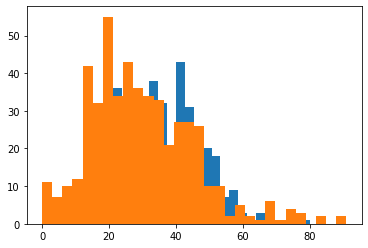

In [40]:
# Compare the histograms ...
plt.hist(y2007, bins=30)
plt.hist(y2006, bins=30)

Some observations:

1. The number of entries in the 2007 and 2006 data sets differ meaning that some state-county pairs did not report county average yields in every year.
2. The histograms do seem to show that the data is of the same general character over the two years. This is a check for sanity.
3. Should sometime look into making better looking histograms perhaps with some transparency of the bar faces.
4. Clearly possible that there are state-county pair present in 2007 that are not in 2006 and vice-versa.
5. Also very possible that the ordering of state-county pairs differs from year to year.

Stay tuned for **Lecture 2.**